In [2]:
from src.datasets.ukbiobank_dataset import UkBiobankDataset, UkBiobankDatasetArgs
from src.experiments.self_learning_experiment import SelfLearningExperiment, SelfLearningExperimentArgs
from src.args.yaml_config import YamlConfig

yaml_config = YamlConfig().config
config = SelfLearningExperimentArgs(
    experiment_id="self_learning_experiment",
    sam_model="vit_b",
    learning_rate=3e-4,
    image_encoder_lr=1e-4,
    prompt_encoder_lr=3e-3,
    mask_decoder_lr=1e-3,
    batch_size=8,
    secondary_batch_size=8,
    epochs=100,
    weight_decay=1e-4,
    warmup_epochs=5,
    ema_decay_origin=0.5,
    early_stopping_patience=10,
    visualize_n_segmentations=5,
    gamma=0.85,
    step_size=5,
    best_model_metric="IoU",
    minimize_best_model_metric=False,
    from_checkpoint="/dhc/home/leon.hermann/MP/mp-lippert-experiments/results/multi_ds_vessel_experiment/2024-12-27_17#55#52/model.pt",
)

experiment = SelfLearningExperiment(dict(config), yaml_config)

/dhc/home/leon.hermann/MP/mp-lippert-experiments/src/models/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)
/dhc/

ImageNet pretrained weights for HarDNet68 is loaded
loading model from checkpoint /dhc/home/leon.hermann/MP/mp-lippert-experiments/results/multi_ds_vessel_experiment/2024-12-27_17#55#52/model.pt


/dhc/home/leon.hermann/MP/mp-lippert-experiments/src/experiments/base_experiment.py:172: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(path, map_location="cuda"),

Attempting to load history from checkpoint

ImageNet pretrained weights for HarDNet68 is loaded


/dhc/home/leon.hermann/MP/mp-lippert-experiments/src/experiments/self_learning_experiment.py:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(self.base_config.fr

In [3]:
unlabeled_loader = experiment.unlabeled_loader
teacher_model = experiment.model
iter_unlabeled = iter(unlabeled_loader)

In [5]:
from src.models.auto_sam_model import norm_batch


batch = next(iter_unlabeled).cuda()
teacher_model.eval()
images = batch.input
pseudo_labels = norm_batch(teacher_model.forward(batch).logits)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6447972..5.519821].


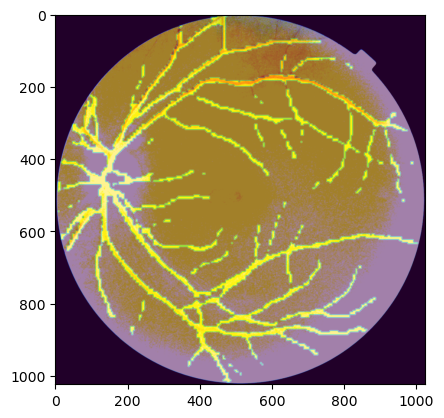

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6447972..6.236272].


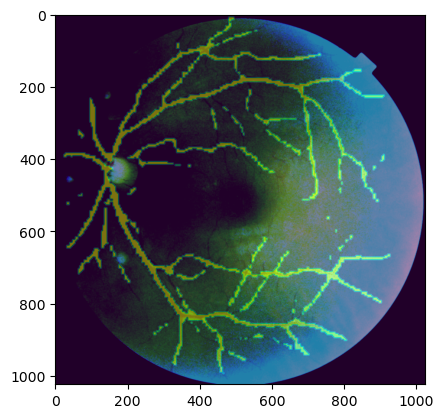

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6447972..4.8286796].


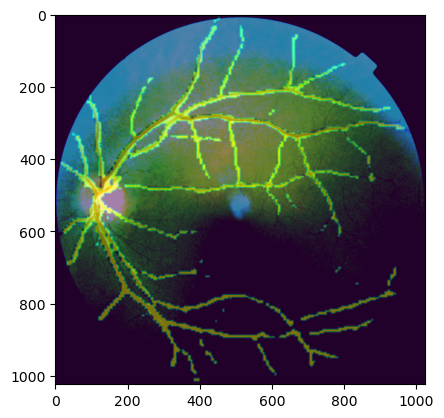

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6447972..10.308583].


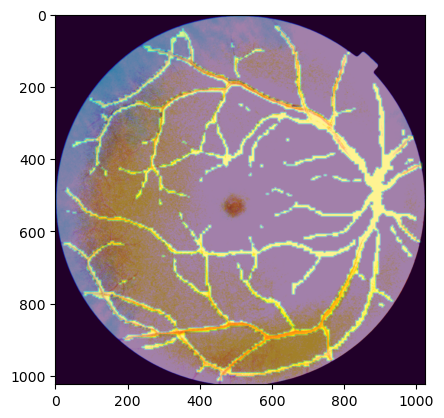

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6447972..5.739262].


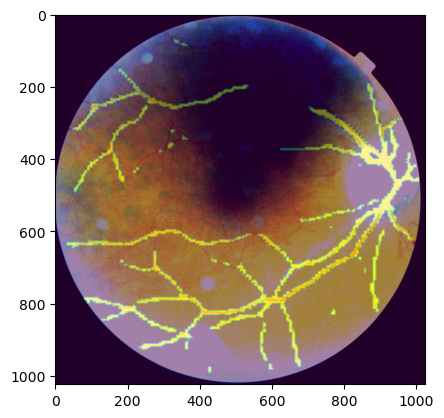

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6447972..6.455713].


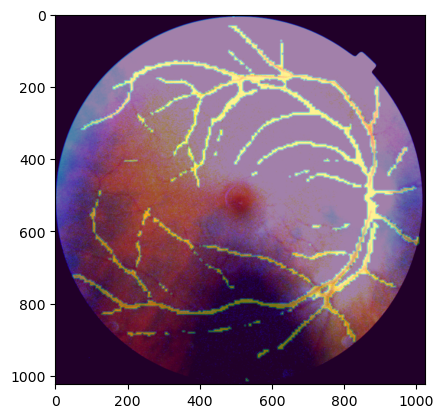

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6447972..7.9689927].


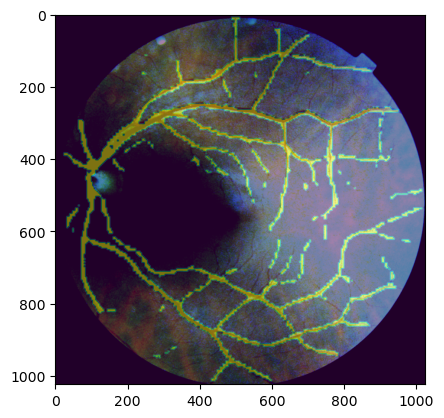

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6447972..4.8172765].


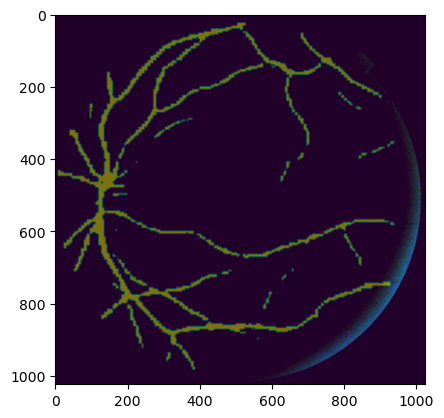

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

# Threshold pseudo_labels
thresholded_pseudo_labels = (pseudo_labels > 0.5).float()

for i in range(8):
    image = images[i].cpu().numpy().transpose(1, 2, 0)
    pseudo_label = F.interpolate(thresholded_pseudo_labels[i].unsqueeze(0), size=(1024, 1024), mode='bilinear', align_corners=False).squeeze(0).detach().cpu().numpy().transpose(1, 2, 0)
    plt.imshow(image)
    plt.imshow(pseudo_label, alpha=0.5)
    plt.show()